In [33]:
import sys
sys.path.append(r"C:\Users\User\Downloads\60 days of python\day-27")

In [34]:
%matplotlib notebook


In [35]:
import class_utils
from class_utils.lab_utils_common import plot_data, dlc
print("class_utils working!")

class_utils working!


In [36]:
#pip install PyQt5

In [37]:
import pandas as pd
%matplotlib qt
import numpy as np
import class_utils
import matplotlib.pyplot as plt

from class_utils.lab_utils_common import dlc, plot_data, draw_vthresh, sigmoid
from class_utils.plt_one_addpt_onclick import plt_one_addpt_onclick
from class_utils.plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from class_utils.plt_logistic_loss import (
    soup_bowl,
    plt_logistic_squared_error,      # ← This is the one!
    plt_logistic_cost,
    plt_simple_example,
    plt_two_logistic_loss_curves
)
%matplotlib notebook
plt.style.use('deeplearning.mplstyle')
cancer_dataset=pd.read_csv('cancer.csv')
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84358402,M,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
4,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [38]:
cancer_dataset['diagnosis'].value_counts(
).reset_index()

,diagnosis,count
0,B,357
1,M,116


In [39]:
cancer_dataset=cancer_dataset[['area_mean','diagnosis']]
cancer_dataset.head()

,area_mean,diagnosis
0,1001.0,M
1,1326.0,M
2,1203.0,M
3,1297.0,M
4,1040.0,M


In [40]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
print("ipywidgets version:", widgets.__version__)
print("All good!")

ipywidgets version: 8.1.8
All good!


In [41]:
numerical_cols = cancer_dataset.select_dtypes(include='number').columns
categorical_cols = cancer_dataset.select_dtypes(include='object').columns

In [42]:
mins= cancer_dataset[numerical_cols].min()
maxs= cancer_dataset[numerical_cols].max()


In [43]:
cancer_dataset[numerical_cols] = (cancer_dataset[numerical_cols] - mins)/(maxs - mins)
cancer_dataset.head()

,area_mean,diagnosis
0,0.363733,M
1,0.501591,M
2,0.449417,M
3,0.489290,M
4,0.380276,M


In [44]:
cancer_dataset[categorical_cols] = cancer_dataset[categorical_cols].apply(
    lambda col: pd.Categorical(col).codes
)
cancer_dataset.head()

,area_mean,diagnosis
0,0.363733,1
1,0.501591,1
2,0.449417,1
3,0.489290,1
4,0.380276,1


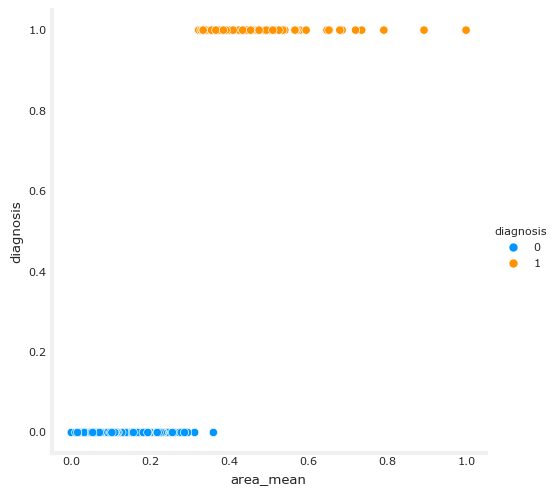

In [45]:
import seaborn as sns
%matplotlib inline

sns.relplot(
    data=cancer_dataset,
    x='area_mean',
    y='diagnosis',
    hue='diagnosis',
)


In [46]:
seed = 142
np.random.seed(seed)

def split_dataset(dataset, training_ratio=0.6, val_ratio=0.2):
    no_of_examples = len(dataset)

    random_indices = np.random.permutation(no_of_examples)

    train_size = int(no_of_examples * training_ratio)
    val_size = int(no_of_examples * val_ratio)

    train_indices = random_indices[:train_size]
    val_indices = random_indices[train_size:train_size + val_size]
    test_indices = random_indices[train_size + val_size:]

    train_ds = dataset.iloc[train_indices]
    val_ds = dataset.iloc[val_indices]
    test_ds = dataset.iloc[test_indices]

    train_X = np.array(train_ds.iloc[:, :-1])
    train_y = np.array(train_ds.iloc[:, -1])
    val_X = np.array(val_ds.iloc[:, :-1])
    val_y = np.array(val_ds.iloc[:, -1])
    test_X = np.array(test_ds.iloc[:, :-1])
    test_y = np.array(test_ds.iloc[:, -1])
    return train_X, train_y, val_X, val_y, test_X, test_y


train_X, train_y, val_X, val_y, test_X, test_y = split_dataset(cancer_dataset)

In [47]:
import matplotlib
print(matplotlib.__version__)

3.10.7


In [73]:
""" linear regression: y = w * x + b
"""

%matplotlib inline
%matplotlib qt
w = np.zeros(1)
b = 0
plt.close('all')
__ = plt_one_addpt_onclick(train_X, train_y, w, b, logistic=False)


In [49]:
""" Logistic Regression:
z = w * x + b
y = g(z)
g is a sigmoid/logistic function.
g(z) = 1 / (1 + e^(-z))
"""

z = np.arange(-10, 11)
g = 1 / (1 + np.exp(-z))

print(f"z={z}\n, g={g}")

z=[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
, g=[4.54e-05 1.23e-04 3.35e-04 9.11e-04 2.47e-03 6.69e-03 1.80e-02 4.74e-02
 1.19e-01 2.69e-01 5.00e-01 7.31e-01 8.81e-01 9.53e-01 9.82e-01 9.93e-01
 9.98e-01 9.99e-01 1.00e+00 1.00e+00 1.00e+00]


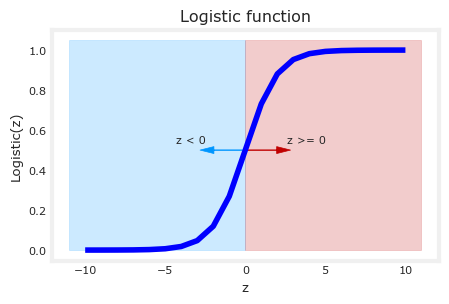

In [61]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z, g, c="b")

ax.set_title("Logistic function")
ax.set_ylabel('Logistic(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

In [51]:
""" ML Algorithm: Logistic Regression"""
def get_cancer_prediction(x, w, b):
    z = w * x + b
    g = 1 / (1 + np.exp(-z))
    return g

In [75]:
%matplotlib inline
%matplotlib qt

plt.close('all')
__ = plt_one_addpt_onclick(train_X, train_y, w, b, logistic=True)

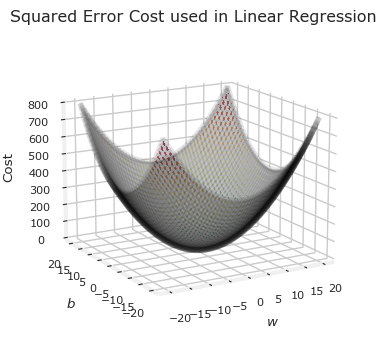

In [69]:
"""What is concept of selecting cost function for a task?
- Select such a cost function where it is guaranteed that
the gradient descent algorithm is able to minimize the cost function
"""
%matplotlib inline
soup_bowl()

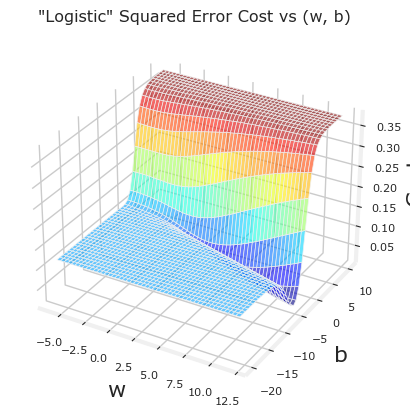

In [68]:

%matplotlib inline
plt.close('all')
plt_logistic_squared_error(train_X, train_y)#this curve is plotted for only two parameter w and b.For multiple parameters, the visualization would be different, and further research is needed to determine how it would look.”
plt.show()

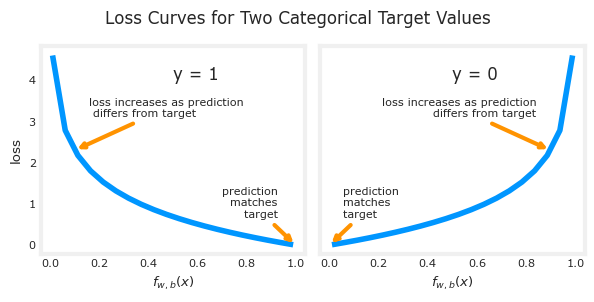

In [55]:
""" Cost function: Logistic loss / Binary cross entropy loss

log_loss = y_true * log(y_pred) - (1 - y_true) * log(1 - y_pred)

if y_true = 1, log_loss = log(y_pred)
               if y_pred = 1, log_loss = 0
               if y_pred = 0, log_loss = 10

if y_true = 0, log_loss = -log(1 - y_pred)
               if y_pred = 1, log_loss = -log(1 - 1) = -log 0 = 10
               if y_pred = 0, log_loss = 0

y_pred_1, log_loss = 10
y_pred_2, log_loss = 0
y_pred_3, log_loss = 0,
y_pred_4, log_loss = 0

avg. log loss = (10+0+0+0)/4 = 2.5
"""
%matplotlib inline
plt.close('all')
plt_two_logistic_loss_curves()

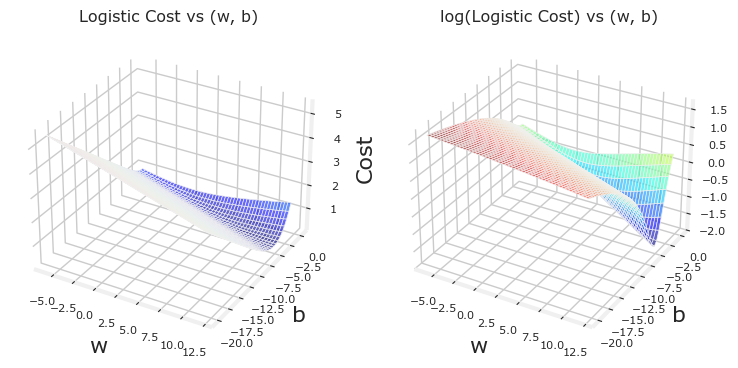

In [56]:
%matplotlib qt
%matplotlib inline
plt.close('all')
cst = plt_logistic_cost(train_X, train_y)

In [57]:
""" Cost function
"""

def cost_function(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        y_pred = get_cancer_prediction(X[i], w, b)
        log_loss = -y[i]*np.log(y_pred) - (1-y[i])*np.log(1-y_pred)
        cost += log_loss

    cost = cost / m
    return cost[0]

In [58]:
log_loss = cost_function(train_X, train_y, w, b)
print(f"Log loss is {log_loss}  (Parameters not learned yet.)")

Log loss is 0.6931471805599466  (Parameters not learned yet.)


In [59]:
"""Gradient Descent
- Compute cost (done)
- Compute gradients
- Update parameters
"""

def compute_gradient(X, y_true, w, b):
    delta = 1e-9
    cost_1 = cost_function(X, y_true, w, b)
    cost_2 = cost_function(X, y_true, w + delta, b)
    cost_3 = cost_function(X, y_true, w, b + delta)
    dw = (cost_2 - cost_1) / delta
    db = (cost_3 - cost_1) / delta
    return dw, db

In [71]:

THRESHOLD = 0.5

def train_model(train_X, train_y, val_X, val_y, epochs=10000, lr=0.001):
    """ Initialize parameters """
    w = np.random.randint(0, 10, 1)
    b = 0

    for epoch in range(epochs):
        """ Compute gradients """
        dw, db = compute_gradient(train_X, train_y, w, b)

        """ Update parameters """
        w = w - lr * dw
        b = b - lr * db

        if epoch % 1000 == 0:
            """ Compute logits / loss """
            loss = cost_function(train_X, train_y, w, b)
            val_loss = cost_function(val_X, val_y, w, b)
            print(f"epoch:{epoch}/{epochs}, loss:{loss:.3f}, val_loss:{val_loss:0.3f}")

    return w, b

w, b = train_model(train_X, train_y, val_X, val_y)
print("Weight:", w, "bias:", b)

epoch:0/10000, loss:0.714, val_loss:0.714
epoch:1000/10000, loss:0.611, val_loss:0.617
epoch:2000/10000, loss:0.548, val_loss:0.559
epoch:3000/10000, loss:0.509, val_loss:0.524
epoch:4000/10000, loss:0.485, val_loss:0.502
epoch:5000/10000, loss:0.468, val_loss:0.488
epoch:6000/10000, loss:0.458, val_loss:0.479
epoch:7000/10000, loss:0.450, val_loss:0.473
epoch:8000/10000, loss:0.444, val_loss:0.468
epoch:9000/10000, loss:0.439, val_loss:0.465
Weight: [2.19] bias: -1.4038654859716004


In [29]:
test_loss = cost_function(test_X, test_y, w, b)
print(f"log_loss is {test_loss}")

log_loss is 0.30898241616146493


# **Evaluation Metrics**

In [30]:
""" Evaluation metric: Accuracy
"""

y_pred_train = get_cancer_prediction(train_X, w, b)
y_pred_train = np.where(y_pred_train >= THRESHOLD, 1, 0)

train_acc = 0
for i in range(len(y_pred_train)):
    if y_pred_train[i] == train_y[i]:
        train_acc += 1
train_acc = train_acc / len(y_pred_train) * 100.0

y_pred_test = get_cancer_prediction(test_X, w, b)
y_pred_test = np.where(y_pred_test >= THRESHOLD, 1, 0)

test_acc = 0
for i in range(len(y_pred_test)):
    if y_pred_test[i] == test_y[i]:
        test_acc += 1
train_acc = test_acc / len(y_pred_test) * 100.0

print(f"Train accuracy: {train_acc:0.2f}%")
print(f"test accuracy: {test_acc:0.2f}%")

Train accuracy: 94.79%
test accuracy: 91.00%
